In [ ]:
# Reload code changes without restarting kernel
%load_ext autoreload
%autoreload 2

# Import libraries
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import logging

from bird_cv.get_label_studio_annotations import get_label_studio_annotations
from bird_cv.get_label_tables import get_label_tables
from bird_cv.annotations_to_yolo import stream_annotations_to_yolo
from bird_cv.show_yolo_annotations import show_annotated_frame


API_KEY = "FILL"

LABEL_JSON_PATH = Path("scratch/annotations.json")
PROCESSED_LABEL_DIR = Path("scratch")
	


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
# Set up logging to view code progress
logging.basicConfig(
    level=logging.INFO,  # or DEBUG for more detail
    format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
)

In [55]:
# Export annotations out of label studio
get_label_studio_annotations(
	host="localhost",
	port=8080,
	api_key=API_KEY,
	project_name="Bird CV",
	output_path=LABEL_JSON_PATH,
    interpolate_frames=False
)

2026-01-02 15:33:38,733 - INFO - bird_cv.get_label_studio_annotations - Starting annotation export for project 'Bird CV'
2026-01-02 15:33:38,734 - INFO - bird_cv.get_label_studio_annotations - Found open port: 8081
2026-01-02 15:33:38,735 - INFO - bird_cv.get_label_studio_annotations - Starting Label Studio at localhost:8081
2026-01-02 15:33:41,991 - INFO - httpx - HTTP Request: POST http://localhost:8081/api/token/refresh/ "HTTP/1.1 200 OK"
2026-01-02 15:33:41,997 - INFO - httpx - HTTP Request: GET http://localhost:8081/api/current-user/whoami "HTTP/1.1 200 OK"
2026-01-02 15:33:41,998 - INFO - bird_cv.get_label_studio_annotations - Label Studio connection verified
2026-01-02 15:33:42,015 - INFO - httpx - HTTP Request: GET http://localhost:8081/api/projects/?page=1 "HTTP/1.1 200 OK"
2026-01-02 15:33:42,016 - INFO - bird_cv.get_label_studio_annotations - Found project 'Bird CV' with ID 3
2026-01-02 15:33:42,017 - INFO - bird_cv.get_label_studio_annotations - Creating export snapshot for

In [56]:
# Stream annotations and convert them to yolo labels
stream_annotations_to_yolo(
    path_to_videos=Path("/Users/sdougherty/Documents/code/data/2021_bunting_clips"),
    path_to_annotations=Path("scratch/annotations.json"),
    path_to_output=Path("scratch/yolo")
)

Processing videos: 0it [00:00, ?it/s]libpng error: Write Error
libpng error: Write Error
libpng error: Write Error
Processing videos: 0it [00:13, ?it/s]


OSError: [Errno 28] No space left on device: 'scratch/yolo/labels/H7%2CI22.08.mp4_frame_0245.txt'

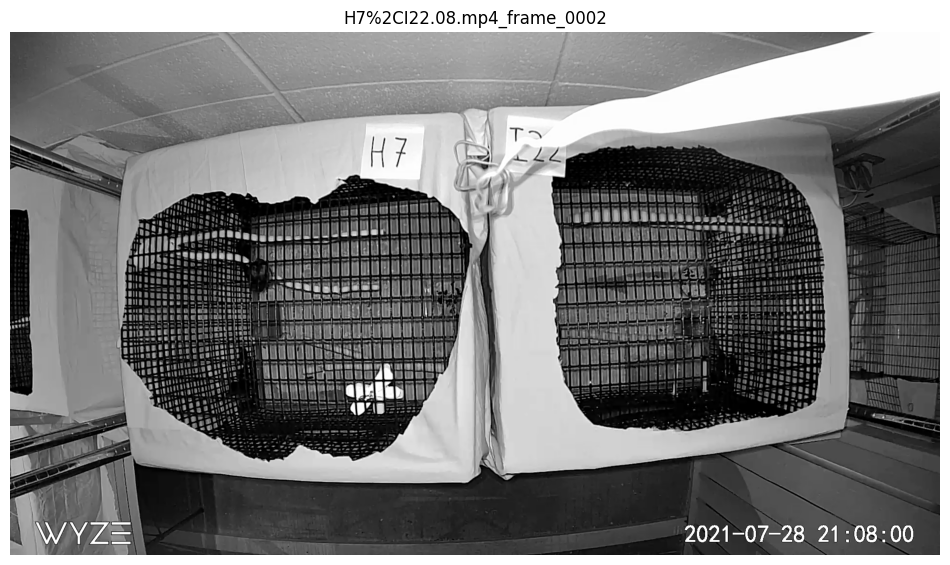

In [58]:
# Visualize labels
show_annotated_frame(
    path_to_yolo=Path("scratch/yolo"),
    frame_name="H7%2CI22.08.mp4_frame_0002.png"
)

## Scratch

In [ ]:
# Process the tables and generate the output files
get_label_tables(
	label_json_path=LABEL_JSON_PATH,
	output_dir=PROCESSED_LABEL_DIR
)

/var/folders/dn/1vsxzrkn18b5rm7z5x9zs4hh0000gn/T/ipykernel_16984/941400745.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="pastel")


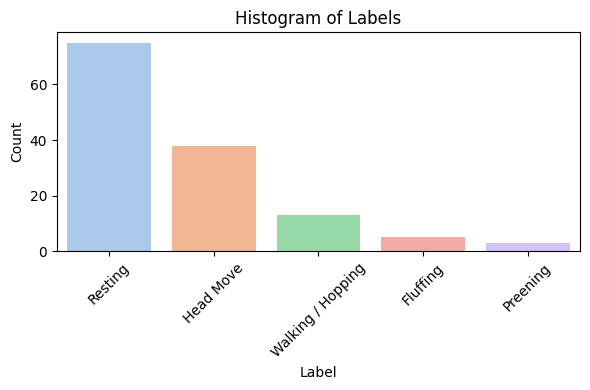

In [ ]:
# Plot unique behavior labels
frames = pl.read_ndjson(Path("scratch") / "frame_data.ndjson")

# Count occurrences of each label
counts = frames.unique(subset="track_id").group_by("label").len().sort("len", descending=True)

# Convert to lists for seaborn
labels = counts["label"].to_list()
values = counts["len"].to_list()

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=values, palette="pastel")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Histogram of Labels")

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()